# scikit-learn User Guide

https://scikit-learn.org/stable/user_guide.html

# 1.1. Linear Models

Linear Models(선형 모델)은 종속변수(y)와 독립변수(x)간의 관계를 선형결합으로 표현한 식을 말합니다.

$ \hat{y}(w,x) = w_0 + w_1x_1 + ... + w_px_p $

일반적으로 최소제곱법을 사용하여 회귀계수, 가중치($w$)를 추정해 선형 모델을 세웁니다.

## 1.1.1. Ordinary Least Squares

최소제곱법(OLS : Ordinary Least Squares)은 잔차 제곱합(RSS : Residual Sum of Squares)을 최소화하는 회귀 계수($w$)를 구하는 방법입니다.<br>

$\min_{w} || X w - y||_2^2$

쉽게 말해 관측값과 예측값의 차이를 최소화 한다고 생각하면 됩니다.

### Example) Linear Regression Example
- 이 예제에서는 당뇨병 Data Set을 이용해 선형 모델이 Data Set에서 관찰된 y값과 예측된 y값 사이의 잔차 제곱합을 가장 잘 최소화 하는 선형 모델을 만드는 방법을 확인할 수 있습니다.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
print(data.keys())
print(f'data : {data.feature_names}')

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
data : ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [5]:
# data load
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)

# use only one feature(bmi)
diabetes_X = diabetes_X[:, np.newaxis, 2]

print(diabetes_X.shape, diabetes_y.shape)

(442, 1) (442,)


In [6]:
# train, test split
diabetes_X_train, diabetes_X_test = diabetes_X[:-20], diabetes_X[-20:]
diabetes_y_train, diabetes_y_test = diabetes_y[:-20], diabetes_y[-20:]

print(diabetes_X_train.shape, diabetes_X_test.shape, diabetes_y_train.shape, diabetes_y_test.shape)

(422, 1) (20, 1) (422,) (20,)


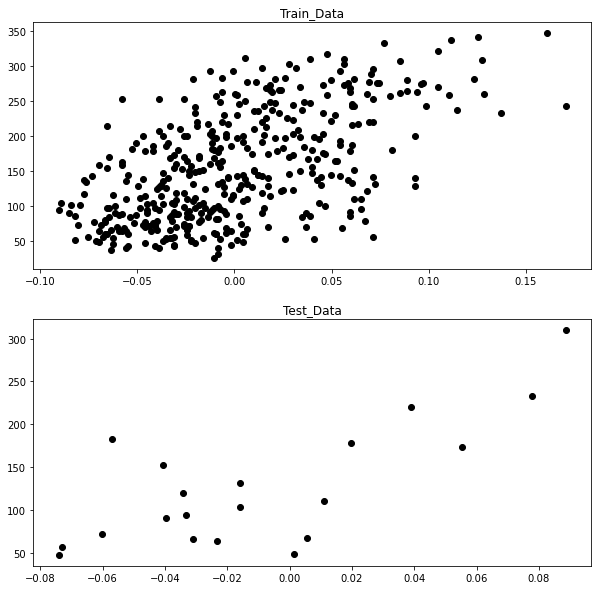

In [7]:
plt.rcParams["figure.figsize"] = (10, 10)

plt.subplot(2,1,1)
plt.title('Train_Data')
plt.scatter(diabetes_X_train, diabetes_y_train, color='black')

plt.subplot(2,1,2)
plt.title('Test_Data')
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.show()

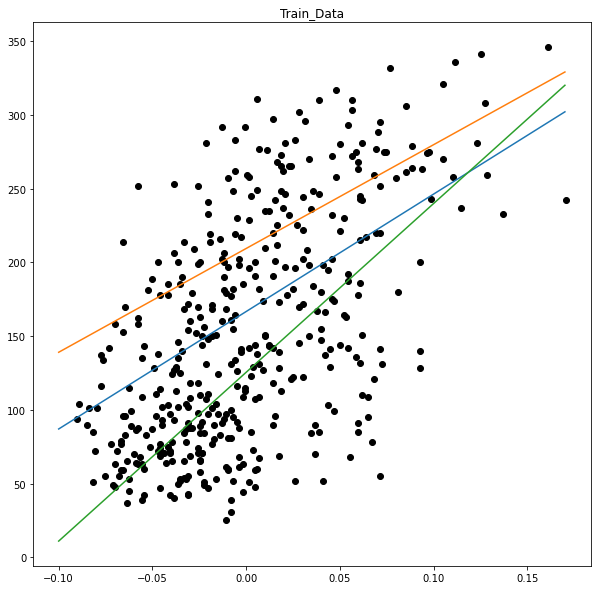

In [8]:
import random

plt.title('Train_Data')
plt.scatter(diabetes_X_train, diabetes_y_train, color='black')
plt.plot([-0.1, 0.17], [random.randint(0,150), random.randint(250,350)])
plt.plot([-0.1, 0.17], [random.randint(0,150), random.randint(250,350)])
plt.plot([-0.1, 0.17], [random.randint(0,150), random.randint(250,350)])
plt.show()

In [9]:
# create linear regression object
regr = linear_model.LinearRegression()

# training
regr.fit(diabetes_X_train, diabetes_y_train)

# make predictions
diabetes_y_pred = regr.predict(diabetes_X_test)

W(coefficients) : [938.23786125]
Mean Squared Error : 2548.0723987259703
r2_score : 0.47257544798227136


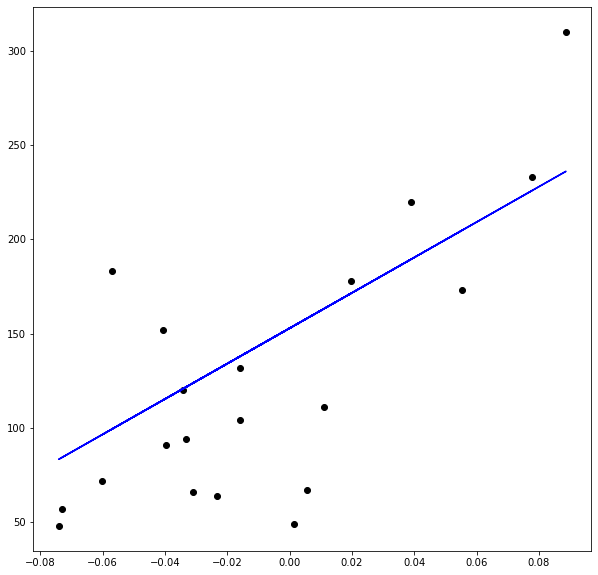

In [10]:
# coefficients
print(f'W(coefficients) : {regr.coef_}')

# mean squared error
print(f'Mean Squared Error : {mean_squared_error(diabetes_y_test, diabetes_y_pred)}')

# coefficient of determination
print(f'r2_score : {r2_score(diabetes_y_test, diabetes_y_pred)}')

# plot output
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color = 'blue')
plt.show()

### 1.1.1.1. Non-Negative Least Squares

NNLS(Non-Negative Least Squares)란 최소제곱법에서 회귀 계수(W)가 음수가 되는 것을 허용하지 않는 방법입니다.<br>
독립변수가 빈도수나 상품가격 등을 나타낼 때 사용할 수 있습니다.<br>
scikit-learn의 LinearRegression()의 positive 매개변수를 True로 설정하면 NNLS가 적용 됩니다. <br>

### Example) Non-negative least squares
- 회귀 계수에 대한 NNLS으로 추정한 선형모델을 fitting하고 OLS 선형 모델과 비교합니다.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [12]:
# seed 설정
np.random.seed(42)

n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features) # shape == (200, 50)
true_coef = 3 * np.random.randn(n_features) # shape == (50,)

# 양의 제약조건을 설정
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)

# noise 추가
y += 5 * np.random.normal(size=(n_samples,))

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [14]:
print(f'true_coef : {true_coef}')

true_coef : [0.         0.         0.         0.33125414 3.59153559 0.
 3.00246149 0.         0.         2.45578386 2.76580913 2.55422981
 0.         0.         2.46896578 0.12462552 0.         1.37495382
 0.         5.38357455 4.63452439 1.81229228 4.08302011 0.19437405
 2.29631248 4.43316089 0.73649605 0.         0.         0.
 2.47026955 2.83690028 1.5130952  0.         0.         0.
 0.         0.         1.85566907 5.95702923 0.37058761 0.
 0.         0.3731543  0.         0.36059568 1.35243701 0.62905819
 1.3726258  1.30124283]


- OLS fitting

In [81]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print(f'OLS Coefficient : {reg_ols.coef_}')
print(f'OLS R2 score : {r2_score_ols}')

OLS Coefficient : [ 1.28168513 -1.28844518  0.20226258  0.02500373  4.92539674 -0.52479853
  2.4824517   0.95143469  1.0577752   2.50056662  2.58411112  1.96783647
 -0.47411806  0.41917169  2.94863573  0.4081959  -0.07420422  1.58777415
  0.03620705  5.44999794  5.11784678  1.92551583  3.88275153  0.31266597
  1.61481593  4.92665209  2.17729051  1.09759721 -1.11743953  0.44555934
  2.2388151   3.31316639  1.17471279 -0.16978928 -0.0133825   0.35957287
  0.51079989  0.38119072  1.03229206  8.14455627  0.02391242 -0.1007276
  0.34018775 -1.06953636  0.82579495  0.73183734  0.78080548  0.4480477
 -0.01091276  2.41262826]
OLS R2 score : 0.7436926291700343


- NNLS Fitting

In [80]:
from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive = True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print(f'NNLS Coefficient : {reg_nnls.coef_}')
print(f'NNLS R2 score : {r2_score_nnls}')

NNLS Coefficient : [1.03686461 0.         0.         0.         4.67234641 0.
 2.62681264 0.38478851 0.69336723 2.32506932 2.92309675 1.83000387
 0.         0.39652115 2.49308667 0.45647139 0.         1.54785098
 0.07897252 5.24876537 5.18234002 1.91748832 3.75918102 0.46583565
 1.7968634  4.58607638 2.30242438 0.74725317 0.         0.55826588
 2.30791404 3.44282657 1.50652162 0.         0.15412043 0.33904986
 0.15896728 0.05048814 0.88546063 7.674278   0.         0.
 0.26898677 0.         0.66414423 0.84401139 0.75855987 0.79724836
 0.         2.04036039]
NNLS R2 score : 0.8225220806196525


OLS와 NNLS 간의 회귀 계수를 비교하면 높은 상관 관계가 있음을 관찰할 수 있지만 NNLS는 일부를 0으로 축소합니다.<br>
NNLS는 본질적으로 희소한 결과를 산출합니다.

Text(0, 0.5, 'NNLS regression coefficients')

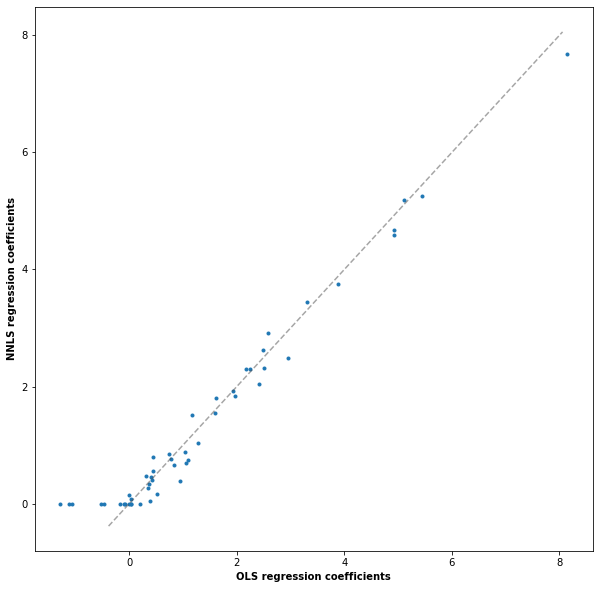

In [82]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")